In [1]:
import warnings;
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
data = pd.read_csv('dataset.csv')
data.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [4]:
data.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [5]:
data['Product'].unique()

array([2667437], dtype=int64)

In [6]:
data['Store'].unique()

array(['QLD_CW_ST0203'], dtype=object)

In [7]:
data.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [14]:
import datetime
data['Year'] = data['Time Date'].apply(lambda x: str(x)[-4:])
data['Month'] = data['Time Date'].apply(lambda x: str(x)[-6:-4])
data['Day'] = data['Time Date'].apply(lambda x: str(x)[-6:])
data['ds'] = pd.DatetimeIndex(data['Year'] +data['Month']+data['Day'])

In [15]:
data.head(5)

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,012018,2018-01-01 20:18:00
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,012018,2018-01-01 20:18:00
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,012018,2018-01-01 20:18:00
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,012018,2018-01-01 20:18:00
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,012018,2018-01-01 20:18:00


In [17]:
data.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [18]:
data.drop(['Time Date', 'Product','Store','Year','Month','Day'],axis=1,inplace=True)
data.columns = ['y','ds']

In [19]:
data.head(5)

,y,ds
0,2926.000,2018-01-01 20:18:00
1,2687.531,2018-01-01 20:18:00
2,2793.000,2018-01-01 20:18:00
3,2394.000,2018-01-01 20:18:00
4,2660.000,2018-01-01 20:18:00


### Train Model

In [20]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


### Forecasting

In [21]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01 20:18:00,3070.995448,841.288826,4403.537749,3070.995448,3070.995448,-408.609611,-408.609611,-408.609611,583.307432,583.307432,583.307432,-991.917043,-991.917043,-991.917043,0.0,0.0,0.0,2662.385838
1,2018-02-02 20:18:00,3105.261820,1182.522823,4551.551337,3105.261820,3105.261820,-323.468863,-323.468863,-323.468863,583.307432,583.307432,583.307432,-906.776295,-906.776295,-906.776295,0.0,0.0,0.0,2781.792957
2,2018-03-03 20:18:00,3136.315724,938.668285,4435.824593,3136.315724,3136.315724,-572.597670,-572.597670,-572.597670,583.307432,583.307432,583.307432,-1155.905102,-1155.905102,-1155.905102,0.0,0.0,0.0,2563.718054
3,2018-04-04 20:18:00,3170.582108,855.722228,4336.763755,3170.582108,3170.582108,-618.374412,-618.374412,-618.374412,583.307432,583.307432,583.307432,-1201.681844,-1201.681844,-1201.681844,0.0,0.0,0.0,2552.207696
4,2018-05-05 20:18:00,3203.777664,2990.874206,6401.001680,3203.777664,3203.777664,1497.903217,1497.903217,1497.903217,583.307432,583.307432,583.307432,914.595785,914.595785,914.595785,0.0,0.0,0.0,4701.680881


In [22]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
131,2021-03-18 20:20:00,4342.509445,2605.335709,5843.517145,4342.318923,4342.677318,-88.271670,-88.271670,-88.271670,587.930049,587.930049,587.930049,-676.201719,-676.201719,-676.201719,0.0,0.0,0.0,4254.237774
132,2021-03-19 20:20:00,4343.597028,2566.810490,6124.008864,4343.404170,4343.767672,63.459144,63.459144,63.459144,587.930049,587.930049,587.930049,-524.470905,-524.470905,-524.470905,0.0,0.0,0.0,4407.056171
133,2021-03-20 20:20:00,4344.684611,3000.609983,6199.572992,4344.488909,4344.858859,201.831711,201.831711,201.831711,587.930049,587.930049,587.930049,-386.098338,-386.098338,-386.098338,0.0,0.0,0.0,4546.516322
134,2021-03-21 20:20:00,4345.772194,3041.977145,6378.924390,4345.573649,4345.949658,322.149588,322.149588,322.149588,587.930049,587.930049,587.930049,-265.780461,-265.780461,-265.780461,0.0,0.0,0.0,4667.921783
135,2021-03-22 20:20:00,4346.859778,3136.880248,6343.168502,4346.658389,4347.040456,420.329248,420.329248,420.329248,587.930049,587.930049,587.930049,-167.600800,-167.600800,-167.600800,0.0,0.0,0.0,4767.189026


In [23]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01 20:18:00,2662.385838
1,2018-02-02 20:18:00,2781.792957
2,2018-03-03 20:18:00,2563.718054
3,2018-04-04 20:18:00,2552.207696
4,2018-05-05 20:18:00,4701.680881
...,...,...
131,2021-03-18 20:20:00,4254.237774
132,2021-03-19 20:20:00,4407.056171
133,2021-03-20 20:20:00,4546.516322
134,2021-03-21 20:20:00,4667.921783


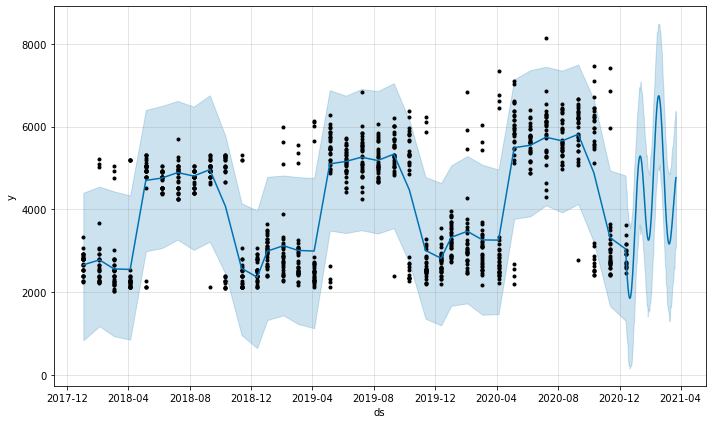

In [24]:
plot1 = m.plot(forecast)

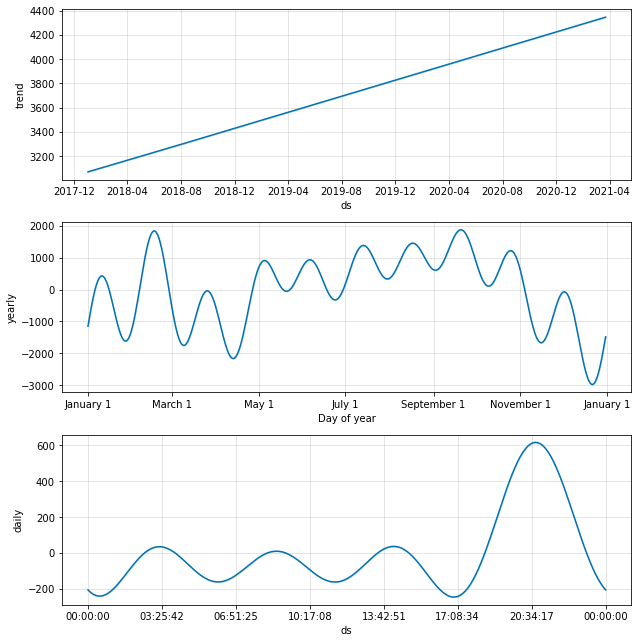

In [25]:
#decompose the trend
plot2 = m.plot_components(forecast)